# Scene Text Detection with CRAFT

This notebook uses an open source implementation of the paper [Character Region Awareness for Text Detection](https://arxiv.org/abs/1904.01941) to detect scene text on a given image.

For other deep-learning Colab notebooks, visit [tugstugi/dl-colab-notebooks](https://github.com/tugstugi/dl-colab-notebooks).


## Install CRAFT

 Install the open source project [CRAFT-pytorch](https://github.com/clovaai/CRAFT-pytorch.git):

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
csv_path = '/content/drive/MyDrive/29544.csv'


In [ ]:
import pandas as pd
df = pd.read_csv(csv_path)

In [ ]:
df.head()

,key,image_name,caption,url,metadata,width,height,channels,is_correct,watermark_resnext50_32x4d-small,watermark_resnext101_32x8d-large,"ViT-L/14 clip score ""picture has watermark""","ViT-L/14 clip score ""slide of presentation with text""","ViT-L/14 clip score ""document with text""","ViT-L/14 clip score ""web site with text""",watermark_prob,webdocument_prob,image_phash_8,is_duplicate,clip_ViT-L/14_similarity
0,57627591,29544000.jpg,Modern mobile phone in hand — Stock Image,https://st2.depositphotos.com/3108485/5762/i/6...,"{""alt"": ""Modern mobile phone in hand Stock Ph...",600.0,544.0,3.0,True,1,1,0.142456,0.168823,0.161377,0.167358,0.712280,0.288232,f03ff66200005effc9fd92360311b7fcfcc907c027311fb0,False,0.187378
1,355696188,29544001.jpg,Colorful abstract creative background — Stock ...,https://st3.depositphotos.com/9899294/35569/i/...,"{""alt"": ""Colorful Abstract Creative Background...",600.0,426.0,3.0,True,0,0,0.196655,0.170410,0.178223,0.184204,0.283276,0.442041,fc7e0ffc7c37e070389c41f803e1f0047f2303f1f91c2c71,False,0.154907
2,527430668,29544002.jpg,Beautiful pink roses in the garden — Stock Image,https://st.depositphotos.com/59445726/52743/i/...,"{""alt"": ""Beautiful Pink Roses Garden Stock Pic...",600.0,450.0,3.0,True,0,0,0.178833,0.124084,0.153564,0.177612,0.194165,0.376123,e370d0e3fffb03af3ffc807f0901fc102007e07fc803ee30,False,0.256836
3,229255030,29544003.jpg,Wild and vibrant abstract watercolor or ink pa...,https://st4.depositphotos.com/19663926/22925/i...,"{""alt"": ""Wild and vibrant abstract watercolor ...",600.0,499.0,3.0,True,0,0,0.163696,0.136475,0.157715,0.154907,0.118481,0.177148,f3efc0e3c1c0e38180fc01f87f81801ffc38ff01f8fc083f,False,0.223389
4,330284058,29544004.jpg,Power bank for charging mobile devices and dev...,https://st3.depositphotos.com/25117232/33028/i...,"{""alt"": ""Power bank for charging mobile device...",600.0,400.0,3.0,True,0,0,0.131592,0.126587,0.129517,0.132812,0.000000,0.000000,ffc9c09d8fc0fc013f62703f607fc01f81f8e17027607e07,False,0.279053


In [ ]:
name = '29544004.jpg'
w = df.loc[df['image_name'] == name].width.item()
print(w)

600.0


In [ ]:
from zipfile import ZipFile

with ZipFile('/content/drive/MyDrive/29544.zip', 'r') as zipObj:
   zipObj.extractall('/content/drive/MyDrive/29544/') 

In [ ]:
%pip install torch
%pip install torchvision
%pip install opencv-python
%pip install scikit-image
%pip install scipy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
%pip install torch==1.13.1+cu117 torchvision==0.14.1+cu117 torchtext==0.14.1 torchaudio==0.13.1 torchdata==0.5.1 --extra-index-url https://download.pytorch.org/whl/cu117

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu117
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 GB 917.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.3/24.3 MB 73.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 55.6 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.1+cu118
    Uninstalling torch-2.0.1+cu118:
      Successfully uninstalled torch-2.0.1+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.2+cu118
    Uninstalling torchvision-0.15.2+cu118:
      Successfully uninstalled torchvision-0.15.2+cu118
  Attempting uninstall: torchtext
    Found existing installation: torchtext 0.15.2
    Uninstalling tor

In [ ]:
import os
from os.path import exists, join, basename, splitext

git_repo_url = 'https://github.com/clovaai/CRAFT-pytorch.git'
project_name = splitext(basename(git_repo_url))[0]
if not exists(project_name):
  # clone and install
  !git clone -q {git_repo_url}
  # !cd {project_name} && pip install -q -r requirements.txt
  
import sys
sys.path.append(project_name)
import time
import matplotlib
import matplotlib.pylab as plt
plt.rcParams["axes.grid"] = False

## Download pretrained model

In [ ]:
def download_from_google_drive(file_id, file_name):
  # download a file from the Google Drive link
  !rm -f ./cookie
  !curl -c ./cookie -s -L "https://drive.google.com/uc?export=download&id={file_id}" > /dev/null
  confirm_text = !awk '/download/ {print $NF}' ./cookie
  confirm_text = confirm_text[0]
  !curl -Lb ./cookie "https://drive.google.com/uc?export=download&confirm={confirm_text}&id={file_id}" -o {file_name}
  

pretrained_model = 'craft_mlt_25k.pth'
if not exists(pretrained_model):
  # download the pretrained model
  !wget -q -O {pretrained_model} 'https://drive.google.com/uc?authuser=0&id=1Jk4eGD7crsqCCg9C9VjCLkMN3ze8kutZ&export=download'

### Run CRAFT on the above test image:

In [ ]:
!cd {project_name} && python test.py --trained_model=../{pretrained_model} --text_threshold=0.91 --test_folder=/content/drive/MyDrive/29544/

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:252: UserWarning: Accessing the model URLs via the internal dictionary of the module is deprecated since 0.13 and may be removed in the future. Please access them via the appropriate Weights Enum instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)
Loading weights from checkpoint (../craft_mlt_25k.pth)
elapsed time : 136.11313557624817s


  ### Delite data without any text filter out images with too little, insignificant text

In [ ]:
from os import listdir
from os.path import join, isfile

mypath = '/content/CRAFT-pytorch/result'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [ ]:
import math 
import numpy as np
new_data = {}

for name in onlyfiles:
  if 'txt' in name:
    idx = int(name.split('.')[0].split('res_')[1])

    name_txt = 'res_'+ str(idx) + '.txt'
    name_mask = 'res_'+ str(idx) + '_mask.jpg'
    name_jpg = 'res_'+ str(idx) + '.jpg'
    path_txt = mypath + '/' + name_txt
    path_jpg = mypath + '/' + name_jpg
    path_mask = mypath + '/' + name_mask

    name = str(idx) + '.jpg'

    #get original size of image
    w = df.loc[df['image_name'] == name].width.item()
    h = df.loc[df['image_name'] == name].height.item()
    s = w*h
    # if the image does not contain text, txt file size = 0
    if os.stat(path_txt).st_size == 0:
      os.remove(path_txt)
      os.remove(path_jpg)
      os.remove(path_mask)
    
    else:
    # Otherwise, open the file and look at the size of the frame 
      f = open(path_txt,'r')
      lines = f.readlines()
      key = 0
      square_sum = []
      for line in lines:
        l = line.strip()
        x1,y1,x2,y2,x3,y3,x4,y4 = l.split(',')
        x1 = int(x1)
        y1 = int(y1)
        x2 = int(x2)
        y2 = int(y2)
        x3 = int(x3)
        y3 = int(y3)
        x4 = int(x4)
        y4 = int(y4)
        wi = math.sqrt((x2-x1)**2 +(y2-y1)**2 )
        hi = math.sqrt((x4-x1)**2 +(y4-y1)**2 ) 
        si = wi*hi #for ONE bbox
        square_sum.append(si)
        #if  image contains at least one large frame, leave this image
        
        if si/s < 0.05:
          continue
        else:
          key = 1
      f.close
      
      if key == 1:# If it's larger, just delete the mask and txt so it doesn't interfere with visualization.
        os.remove(path_txt)
        os.remove(path_mask)

        sum = math.fsum(square_sum) #sum all bboxes
        pers = np.round(sum/s*100,2)
        new_data[name_jpg] = pers
        # print('{}:{}'.format(idx,pers))

      else:# If it is less than 10% then delete this image, mask and txt.
        os.remove(path_txt)
        os.remove(path_jpg)
        os.remove(path_mask)

      # os.remove(path_txt)
      # os.remove(path_jpg)
      # os.remove(path_mask)





In [ ]:
new_data

{'res_29544176.jpg': 12.82,
 'res_29544191.jpg': 6.58,
 'res_29544125.jpg': 13.42,
 'res_29544440.jpg': 12.56,
 'res_29544479.jpg': 8.27,
 'res_29544166.jpg': 24.55,
 'res_29544042.jpg': 26.13,
 'res_29544122.jpg': 9.96,
 'res_29544585.jpg': 42.94,
 'res_29544136.jpg': 5.1,
 'res_29544026.jpg': 12.04,
 'res_29544760.jpg': 17.97,
 'res_29544501.jpg': 13.86,
 'res_29544271.jpg': 8.39,
 'res_29544985.jpg': 7.6,
 'res_29544121.jpg': 46.99,
 'res_29544695.jpg': 22.11,
 'res_29544120.jpg': 21.02,
 'res_29544112.jpg': 59.54,
 'res_29544835.jpg': 15.62,
 'res_29544089.jpg': 20.35,
 'res_29544634.jpg': 7.51,
 'res_29544651.jpg': 8.99,
 'res_29544546.jpg': 22.5,
 'res_29544775.jpg': 13.84,
 'res_29544777.jpg': 11.06,
 'res_29544183.jpg': 10.69}

### Print caption

In [ ]:
mypath = '/content/CRAFT-pytorch/result'
only_text = [f for f in listdir(mypath) if isfile(join(mypath, f))]
for i in range(len(only_text)):
  if ('mask.jpg' in only_text[i]) or ('txt' in only_text[i]):
    continue
  else:
    name = only_text[i]
    idx = int(name.split('.')[0].split('res_')[1])
    name = str(idx) + '.jpg'
    caption = df.loc[df['image_name'] == name].caption.item()
    print('{}: {}'.format(idx,caption))
    


29544183: Share the love handwriting text close up isolated on yellow paper with copy space. — Stock Image
29544122: Ask questions icon — Stock Image
29544191: Just word on computer keyboard pc key — Stock Image
29544120: Prague Czech Republic - 15. October 2021.  Canister with ADBLUE logo and a case about the lack of this fluid in diesel engines. — Stock Image
29544042: Abstract black and white grunge background. Monochrome texture. — Stock Image
29544026: Stagnation or Growth Green Road Sign, business concep — Stock Image
29544985: Set with cartoon numbers for kids and hobbies and packaging and fabrics and wrapping paper and notebooks. High quality photo — Stock Image
29544651: Limited offer icon — Stock Image
29544501: Digital composite image of golden bible with cross shape on happy holidays against stars. celebration, culture and religious symbol. — Stock Image
29544585: Welcome  home wooden background — Stock Image
29544479: Knitted white woolen fabric — Stock Image
29544835: Cou

### Visualize the result:

In [ ]:
!zip -r '/content/drive/MyDrive/test.zip' '/content/CRAFT-pytorch/result'

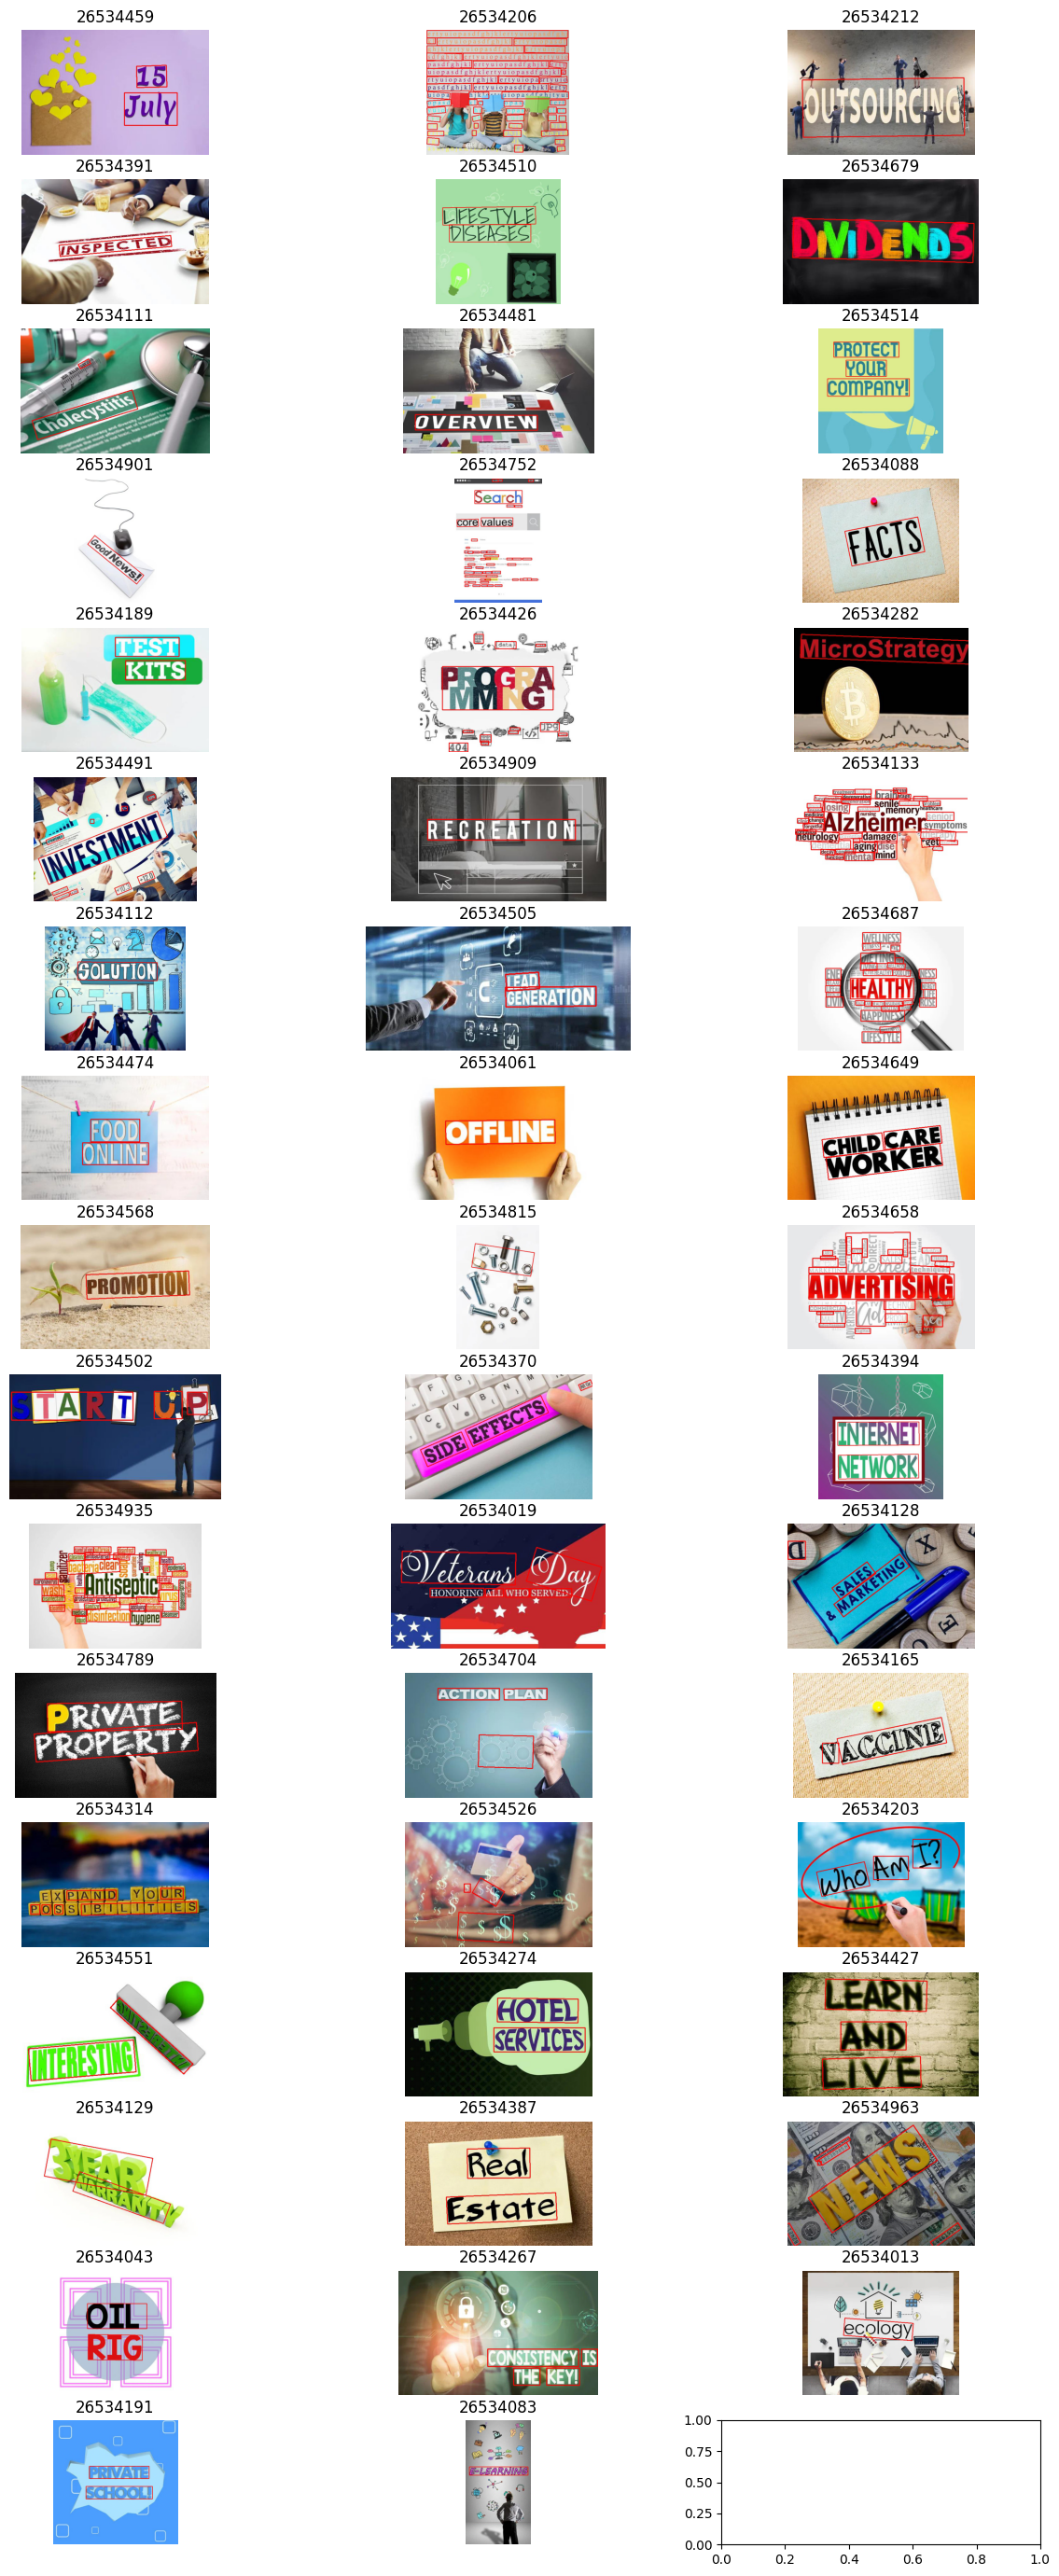

In [ ]:
from PIL import Image
mypath = '/content/CRAFT-pytorch/result/'
only_text = [f for f in listdir(mypath) if isfile(join(mypath, f))]

row = 3
line = (len(only_text) // row) + 1
fig,ax = plt.subplots(line, row, figsize=(14, 50))    

for i,img in enumerate(only_text):
  if ('mask.jpg' in only_text[i]) or ('txt' in only_text[i]):
    continue
  else:
    idx = int(only_text[i].split('.')[0].split('res_')[1])
    path_jpg = mypath + img
    image = Image.open(path_jpg)
    ax[i%line][i//line].title.set_text(idx)
    ax[i%line][i//line].imshow(image)
    ax[i%line][i//line].axis("off")   
fig.show()